<a href="https://colab.research.google.com/github/pejmanS21/ComputerVision_Collections/blob/main/YOLOv5_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone YOLOv5 repo from GitHub

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11263, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 11263 (delta 9), reused 4 (delta 0), pack-reused 11245
Receiving objects: 100% (11263/11263), 11.21 MiB | 30.04 MiB/s, done.
Resolving deltas: 100% (7783/7783), done.


# Install requirements

In [2]:
!cd yolov5 && pip install -q -r requirements.txt

     |████████████████████████████████| 596 kB 24.9 MB/s 


# Download my costume yolov5 version

that detects car licence

In [3]:
!gdown --id 1loAqrXEs-QZ40aDu3ckpWiJTaWwabA72

Downloading...
From: https://drive.google.com/uc?id=1loAqrXEs-QZ40aDu3ckpWiJTaWwabA72
To: /content/best_licence.pt
100% 14.3M/14.3M [00:00<00:00, 58.6MB/s]


In [4]:
import torch
from torchsummary import summary
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
yolo_version = 'yolov5s' #@param ["yolov5n", "yolov5s", "yolov5m", "yolov5x"]
model = torch.hub.load('ultralytics/yolov5', yolo_version)
model

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-12 torch 1.10.0+cu111 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [6]:
img_url = 'https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKTEykgW.lMk/v0/1200x-1.jpg'

!wget {img_url}

--2022-03-12 13:24:11--  https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKTEykgW.lMk/v0/1200x-1.jpg
Resolving assets.bwbx.io (assets.bwbx.io)... 151.101.1.73, 151.101.65.73, 151.101.129.73, ...
Connecting to assets.bwbx.io (assets.bwbx.io)|151.101.1.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165803 (162K) [image/jpeg]
Saving to: ‘1200x-1.jpg’

1200x-1.jpg         100%[===================>] 161.92K  --.-KB/s    in 0.004s  

2022-03-12 13:24:11 (40.7 MB/s) - ‘1200x-1.jpg’ saved [165803/165803]



In [7]:
from PIL import Image

path = img_url.split('/')[-1]
# path = '/content/yolov5/data/images/zidane.jpg'

image = Image.open(path)
image

In [8]:
results = model(image)
results.print()

image 1/1: 800x1200 1 person, 1 bicycle, 13 cars, 4 buss, 4 trucks, 3 traffic lights
Speed: 65.5ms pre-process, 898.3ms inference, 19.4ms NMS per image at shape (1, 3, 448, 640)


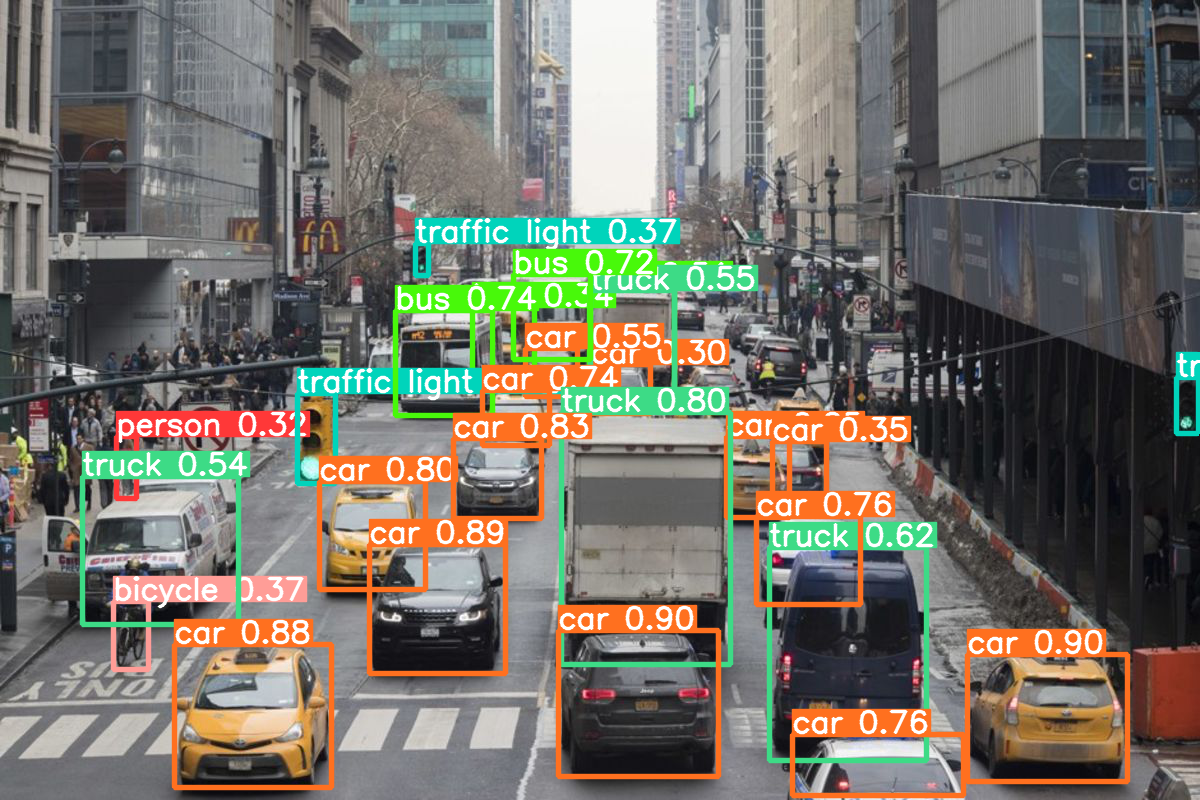

In [9]:
Image.fromarray(results.render()[0][..., ::1])

In [10]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1a/Car_with_export_license_plate_of_Finland.jpg'
!wget {img_url}

--2022-03-12 13:24:14--  https://upload.wikimedia.org/wikipedia/commons/1/1a/Car_with_export_license_plate_of_Finland.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724113 (707K) [image/jpeg]
Saving to: ‘Car_with_export_license_plate_of_Finland.jpg’

Car_with_export_lic 100%[===================>] 707.14K  --.-KB/s    in 0.02s   

2022-03-12 13:24:14 (28.0 MB/s) - ‘Car_with_export_license_plate_of_Finland.jpg’ saved [724113/724113]



In [11]:
img_path = img_url.split('/')[-1]
image = Image.open(img_path)
image

In [12]:
!python /content/yolov5/detect.py --weights /content/best_licence.pt --img 416 --conf 0.1 --source {img_path} --project /content/ --name results --exist-ok


detect: weights=['/content/best_licence.pt'], source=Car_with_export_license_plate_of_Finland.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/, name=results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-31-g701e117 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Car_with_export_license_plate_of_Finland.jpg: 320x416 1 licence, Done. (0.195s)
Speed: 0.8ms pre-process, 194.5ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to /content/results


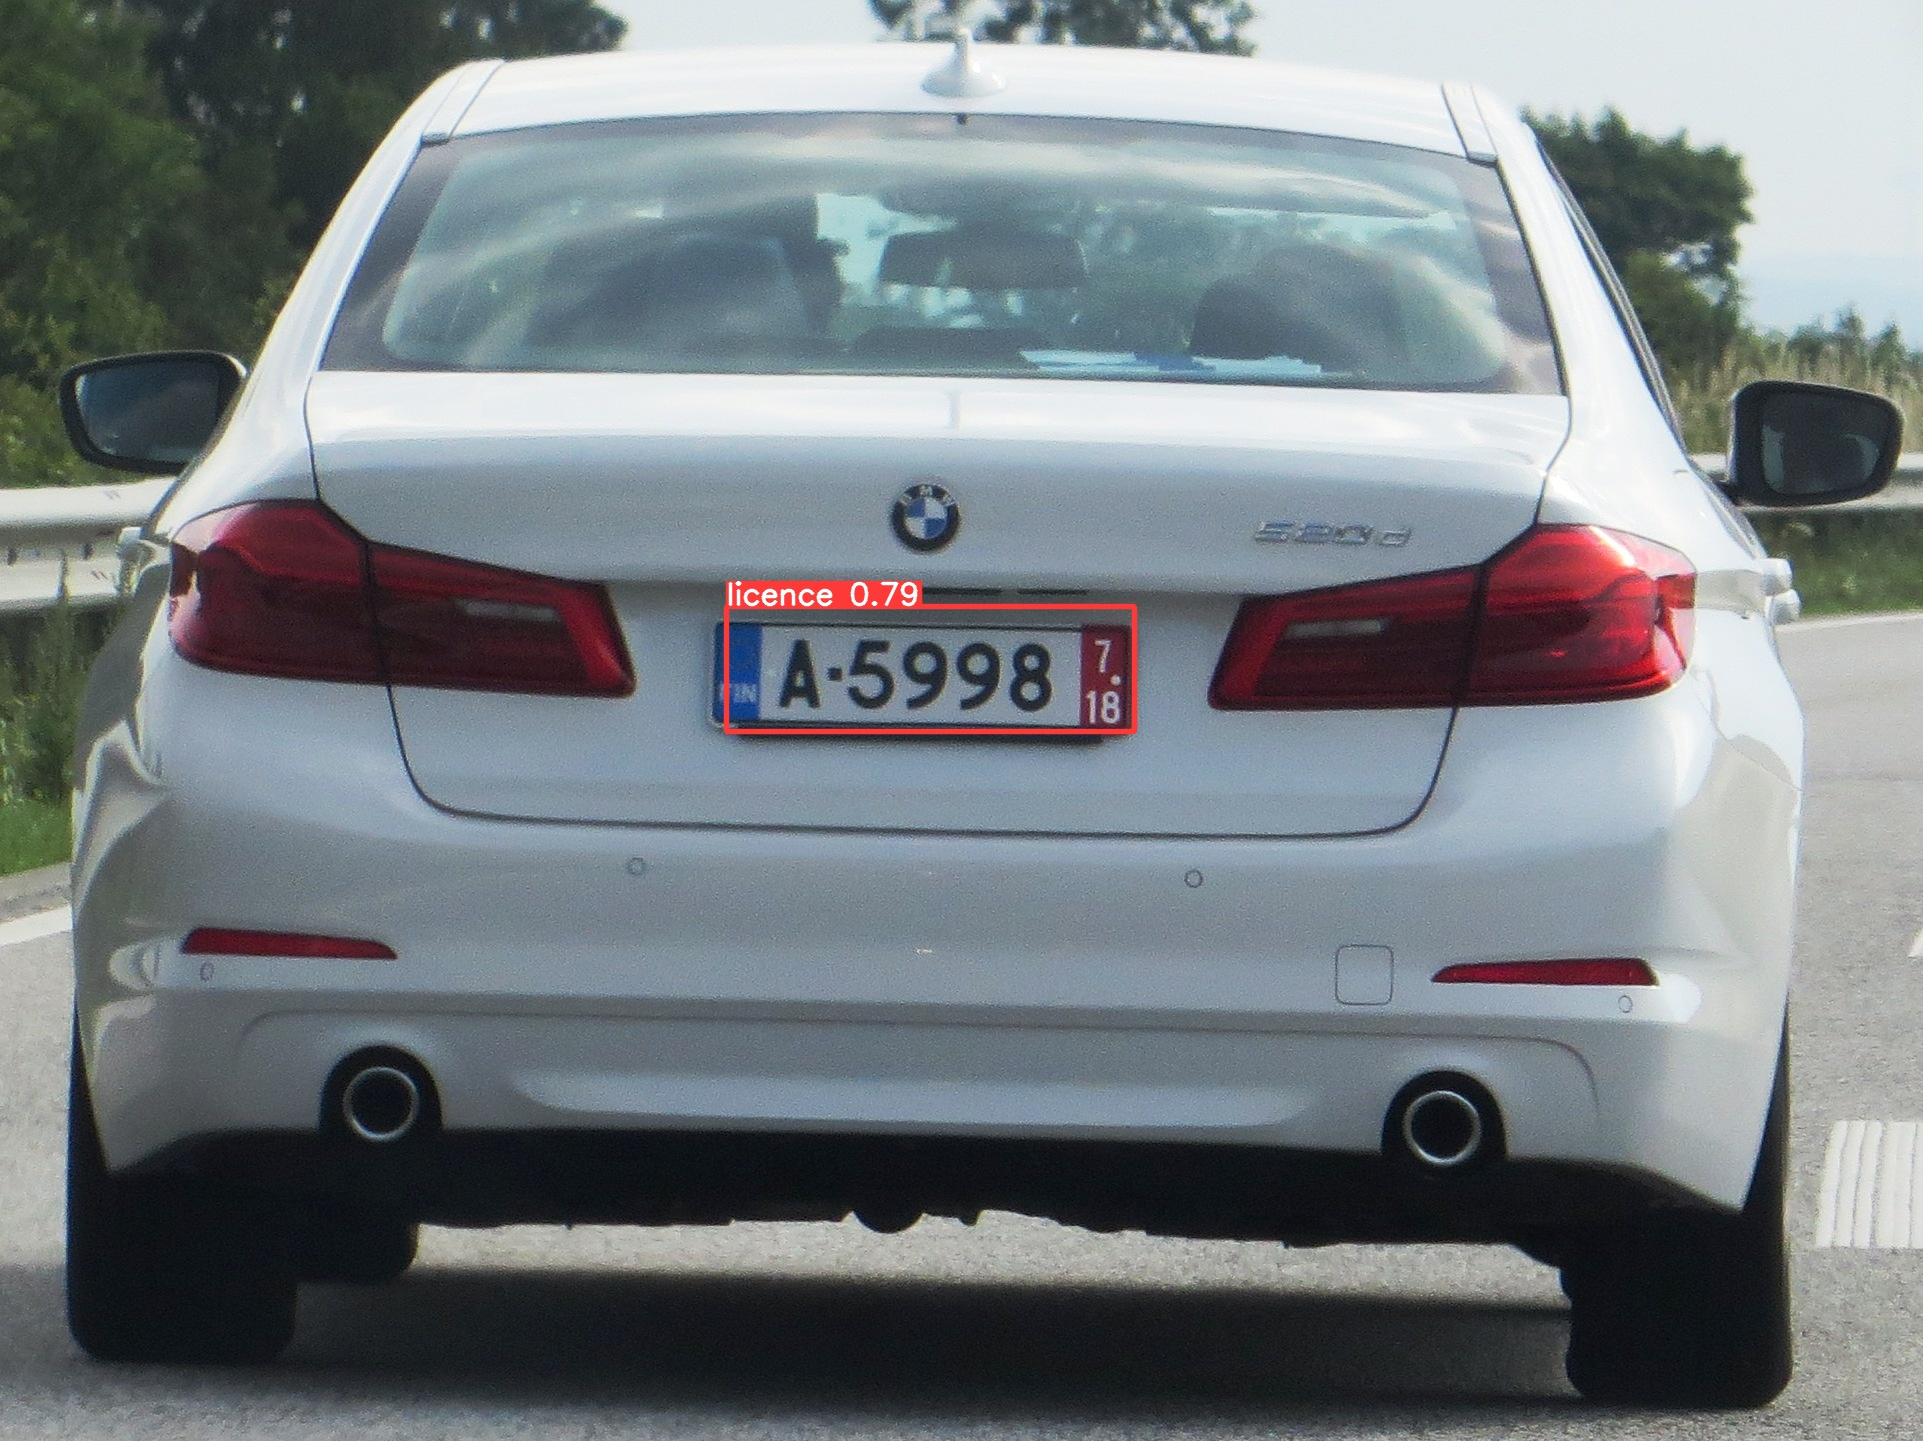

In [13]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/results/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")